In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 영화 데이터(2004-2020) 불러오기

In [2]:
df = pd.read_csv('movie2.csv', index_col=0)
df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급,연도
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004.1.1,스페인,0,0.0,"8,840",코미디,15세관람가,2004
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004.1.9,미국,0,0.0,"1,263,200",액션,15세관람가,2004
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004.1.16,한국,0,0.0,"1,513,000",코미디,12세관람가,2004
3,말죽거리 잔혹사,유하,CJ ENM,2004.1.16,한국,0,0.0,"3,115,767",액션,15세관람가,2004
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004.1.16,미국,0,0.0,"352,691",드라마,전체관람가,2004
...,...,...,...,...,...,...,...,...,...,...,...
14995,발정난 미망인의 유혹,나카지마 타로,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020
14996,선샤인 패밀리,김태식,시네마 뉴원,2020.12.31,한국,26,1168100.0,133,드라마,12세이상관람가,2020
14997,숙모의 망사팬티 무삭제판,와카마츠 쇼군,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020
14998,와이프 렌탈 서비스 무삭제판,사이유키,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020


### 데이터셋

In [3]:
# 관객수 int화
df['관객수'] = df['관객수'].str.replace(',','').astype(int)
df['스크린수'] = df['스크린수'].str.replace(',','').astype(int)

# 결측치 제거
df = df.dropna(how='any').reset_index(drop=True)

# 배급사 전처리
b = pd.Series(df['배급사'])
b = b.str.split(',').str.get(0)
df['배급사'] = b

# 최종 데이터셋; df
df

,영화명,감독,배급사,개봉일,국적,스크린수,매출액,관객수,장르,등급,연도
0,스페니쉬 아파트먼트,세드릭 클래피쉬,이십세기폭스필름코퍼레이션,2004.1.1,스페인,0,0.0,8840,코미디,15세관람가,2004
1,라스트 사무라이,에드워드 즈윅,워너브러더스 코리아(주),2004.1.9,미국,0,0.0,1263200,액션,15세관람가,2004
2,내사랑 싸가지,신동엽,(주)시네마서비스,2004.1.16,한국,0,0.0,1513000,코미디,12세관람가,2004
3,말죽거리 잔혹사,유하,CJ ENM,2004.1.16,한국,0,0.0,3115767,액션,15세관람가,2004
4,브라더 베어,"애론 블레이즈,로버트 워커",한국소니픽쳐스릴리징브에나비스타영화㈜,2004.1.16,미국,0,0.0,352691,드라마,전체관람가,2004
...,...,...,...,...,...,...,...,...,...,...,...
14961,발정난 미망인의 유혹,나카지마 타로,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020
14962,선샤인 패밀리,김태식,시네마 뉴원,2020.12.31,한국,26,1168100.0,133,드라마,12세이상관람가,2020
14963,숙모의 망사팬티 무삭제판,와카마츠 쇼군,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020
14964,와이프 렌탈 서비스 무삭제판,사이유키,(주)영진크리에이티브,2020.12.31,일본,1,6000.0,1,멜로/로맨스,청소년관람불가,2020


### 대형 배급사 Top10; 매출액 기준

In [4]:
# 배급사별 매출액 기준으로 상위10개 배급사 추출
top_df = df[['영화명','배급사','스크린수','관객수','매출액']]
top_bae = top_df.groupby('배급사').sum().sort_values(by='매출액', 
                                        ascending=False).head(10)

top_count = top_df.groupby('배급사')['영화명'].count() # 영화개수 세기
top_count = pd.DataFrame(top_count).reset_index() # 그룹바이 해제
top_count = top_count.rename(columns={'영화명':'영화수'}) # 컬럼명 변경

# 최종 탑10 대형배급사 데이터셋: top_bae
top_bae = top_bae.reset_index() 
top_bae = pd.merge(top_bae, top_count, how='left')
top_bae

,배급사,스크린수,관객수,매출액,영화수
0,(주)씨제이이엔엠,130175,417056788,3.257938e+12,230
1,(주)쇼박스,69145,357401829,1.892092e+12,203
2,롯데쇼핑㈜롯데엔터테인먼트,96619,248158807,1.639763e+12,296
3,(주)넥스트엔터테인먼트월드(NEW),86233,204506038,1.563523e+12,175
4,월트디즈니컴퍼니코리아 유한책임회사,54898,156101574,1.327540e+12,50
5,워너브러더스 코리아(주),81803,199555497,1.283625e+12,173
6,유니버설픽쳐스인터내셔널 코리아(유),76266,131452733,1.000074e+12,206
7,CJ ENM,29489,272221724,9.423594e+11,262
8,이십세기폭스코리아(주),52138,123909053,8.869335e+11,134
9,한국소니픽쳐스릴리징브에나비스타영화㈜,22128,86573998,4.845610e+11,139


### 신예 배급사 Top10; 매출액 기준

#### 1) 신에 배급사 찾기

In [5]:
# 최종 데이터셋 복사 후 df2에 저장
df2 = df.copy()

# 2018부터 2020년 기준 신예 배급사 찾기
mask1 = (df2['연도'] >= 2018)
df_5years = df2.loc[mask1,:]

mask2 = (df['연도'] < 2018)
df_12years = df2.loc[mask2,:]

a1 = df_5years['배급사'].values.tolist()
a2 = df_12years['배급사'].values.tolist()

a3=[]
my_list = []

for i in a1:
    if i not in a2:
        a3.append(i)
        
my_set = set(a3) #집합set으로 변환
my_list = list(my_set) #list로 변환

# 최종 신예배급사 데이터셋; new_df 
new_df = df_5years[df_5years.배급사.isin(my_list)]
new_df = new_df.reset_index(drop=True)
new_df = new_df[['영화명','배급사','스크린수','관객수','매출액']]
new_df

,영화명,배급사,스크린수,관객수,매출액
0,럭키 스티프,(주)영화공간,1,1,2000.0
1,주문은 토끼입니까?? ~디어 마이 시스터~,(주)애니플러스,84,16655,121079000.0
2,기생 : 꽃의 고백,필름에이픽쳐스,5,1863,6404000.0
3,룸 이스케이프,(주)아이아스플러스,5,31,70000.0
4,전설의 고향,(주)아피아스튜디오,1,2,14000.0
...,...,...,...,...,...
574,신입 여사원,주식회사 플릭스코,1,1,6000.0
575,클라운 돌,주식회사 플릭스코,1,1,6000.0
576,거짓말 : 친구엄마 무삭제,뷰소프트,1,1,6000.0
577,스와핑 : 자매의 남자들 무삭제,뷰소프트,1,1,6000.0


#### 2) 신예배급사 Top10 찾기 

In [6]:
# 배급사별 매출액 기준으로 상위10개 배급사 추출
top_new = new_df.groupby('배급사').sum().sort_values(by='매출액', 
                                                  ascending=False).head(10)

new_count = new_df.groupby('배급사')['영화명'].count() # 영화개수 세기
new_count = pd.DataFrame(new_count).reset_index() # 그룹바이 해제
new_count = new_count.rename(columns={'영화명':'영화수'}) # 컬럼명 변경

# 최종 탑10 대형배급사 데이터셋: top_new
top_new = top_new.reset_index() 
top_new = pd.merge(top_new, new_count, how='left')
top_new

,배급사,스크린수,관객수,매출액,영화수
0,롯데컬처웍스(주)롯데엔터테인먼트,32408,53734219,4.498503e+11,37
1,(주)에이스메이커무비웍스,7938,9963749,8.546364e+10,7
2,(주)메리크리스마스,2245,2528324,2.134745e+10,3
3,(주)삼백상회,2814,560973,4.517505e+09,17
4,CGV ICECON,811,469561,4.079353e+09,3
5,(주)애니플러스,1096,310655,2.644039e+09,16
6,(주)트리플픽쳐스,2727,306080,2.490815e+09,23
7,(주)그노스,393,220394,1.926004e+09,2
8,(주)키위미디어그룹,832,190237,1.619782e+09,1
9,(주)셀트리온엔터테인먼트,624,172212,1.304862e+09,1


---------------------------------------------------------------

## 데이터 분석; 시각화

### 1) 대형 배급사 시각화에 필요한 데이터셋 생성
#### 백분율 추가

In [7]:
# 대형배급사 데이터 복사
test1 = top_bae.copy()

# 대형배급사 백분율 구하기
s_sum = top_bae['스크린수'].sum() # 스크린수 합
p_sum = top_bae['관객수'].sum() # 관객수 합
t_sum = top_bae['매출액'].sum() # 매출액 합
m_sum = top_bae['영화수'].sum() # 영화수 합

top_sp = [] # 스크린수 백분율
top_pp = [] # 관객수 백분율
top_tp = [] # 매출액 백분율
top_mp = [] # 영화수 백분율

for i in range(0, 10):
    top_sp.append(round(test1['스크린수'][i]/s_sum*100,1))
    top_pp.append(round(test1['관객수'][i]/p_sum*100,1))
    top_tp.append(round(test1['매출액'][i]/t_sum*100,1))
    top_mp.append(round(test1['영화수'][i]/m_sum*100,1))
    
test1['스크린수(백분율)'] = top_sp
test1['관객수(백분율)'] = top_pp
test1['매출액(백분율)'] = top_tp
test1['영화수(백분율)'] = top_mp

# 대형배급사 시각화 데이터셋1; 전체 기준
test1

,배급사,스크린수,관객수,매출액,영화수,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,(주)씨제이이엔엠,130175,417056788,3.257938e+12,230,18.6,19.0,22.8,12.3
1,(주)쇼박스,69145,357401829,1.892092e+12,203,9.9,16.3,13.3,10.9
2,롯데쇼핑㈜롯데엔터테인먼트,96619,248158807,1.639763e+12,296,13.8,11.3,11.5,15.8
3,(주)넥스트엔터테인먼트월드(NEW),86233,204506038,1.563523e+12,175,12.3,9.3,11.0,9.4
4,월트디즈니컴퍼니코리아 유한책임회사,54898,156101574,1.327540e+12,50,7.9,7.1,9.3,2.7
5,워너브러더스 코리아(주),81803,199555497,1.283625e+12,173,11.7,9.1,9.0,9.3
6,유니버설픽쳐스인터내셔널 코리아(유),76266,131452733,1.000074e+12,206,10.9,6.0,7.0,11.0
7,CJ ENM,29489,272221724,9.423594e+11,262,4.2,12.4,6.6,14.0
8,이십세기폭스코리아(주),52138,123909053,8.869335e+11,134,7.5,5.6,6.2,7.2
9,한국소니픽쳐스릴리징브에나비스타영화㈜,22128,86573998,4.845610e+11,139,3.2,3.9,3.4,7.4


### 2) Top10 대형 배급사 영화 중 10만이 넘은 관객수를 기준으로 데이터셋

In [8]:
top_man_bae = df[df['관객수']>=100000].reset_index(drop=True)
top_man_bae = top_man_bae[['영화명','배급사','스크린수','관객수','매출액']]

top_mb = top_man_bae.groupby('배급사').sum().sort_values(by='매출액', ascending=False).head(10)

man_count = top_man_bae.groupby('배급사')['영화명'].count() # 영화개수 세기
man_count = pd.DataFrame(man_count).reset_index() # 그룹바이 해제
man_count = man_count.rename(columns={'영화명':'영화수'}) # 컬럼명 변경

# 최종 데이터셋; top_mb
top_mb = top_mb.reset_index() 
top_mb = pd.merge(top_mb, man_count, how='left')

# 대형 배급사의 관객수 10만명 이상 그래프
test2 = top_mb.copy()

tnew_sp = [] # 스크린수 백분율
tnew_pp = [] # 관객수 백분율
tnew_tp = [] # 매출액 백분율
tnew_mp = [] # 영화수 백분율

for i in range(0, 10):
    tnew_sp.append(round(test2['스크린수'][i]/s_sum*100,1))
    tnew_pp.append(round(test2['관객수'][i]/p_sum*100,1))
    tnew_tp.append(round(test2['매출액'][i]/t_sum*100,1))
    tnew_mp.append(round(test2['영화수'][i]/m_sum*100,1))
    
test2['스크린수(백분율)'] = tnew_sp
test2['관객수(백분율)'] = tnew_pp
test2['매출액(백분율)'] = tnew_tp
test2['영화수(백분율)'] = tnew_mp

# 대형배급사 시각화 데이터셋2; 10만 기준
test2

,배급사,스크린수,관객수,매출액,영화수,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,(주)씨제이이엔엠,124222,415732446,3.247992e+12,179,17.8,18.9,22.7,9.6
1,(주)쇼박스,66407,356138987,1.886406e+12,171,9.5,16.2,13.2,9.2
2,롯데쇼핑㈜롯데엔터테인먼트,86880,245230456,1.619800e+12,226,12.4,11.2,11.3,12.1
3,(주)넥스트엔터테인먼트월드(NEW),79208,203046273,1.552817e+12,135,11.3,9.2,10.9,7.2
4,월트디즈니컴퍼니코리아 유한책임회사,52927,155848854,1.325578e+12,44,7.6,7.1,9.3,2.4
5,워너브러더스 코리아(주),77655,198279958,1.275413e+12,151,11.1,9.0,8.9,8.1
6,유니버설픽쳐스인터내셔널 코리아(유),64320,128292227,9.781450e+11,124,9.2,5.8,6.9,6.6
7,CJ ENM,27773,270583349,9.356583e+11,175,4.0,12.3,6.6,9.4
8,이십세기폭스코리아(주),49847,122856100,8.805494e+11,104,7.1,5.6,6.2,5.6
9,한국소니픽쳐스릴리징브에나비스타영화㈜,21171,85678301,4.806676e+11,83,3.0,3.9,3.4,4.4


### ● 대형 배급사 그래프 분석

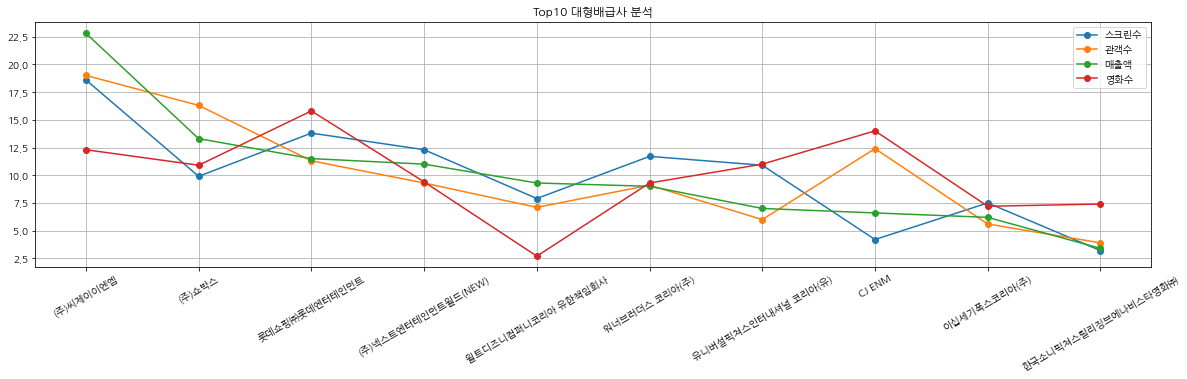

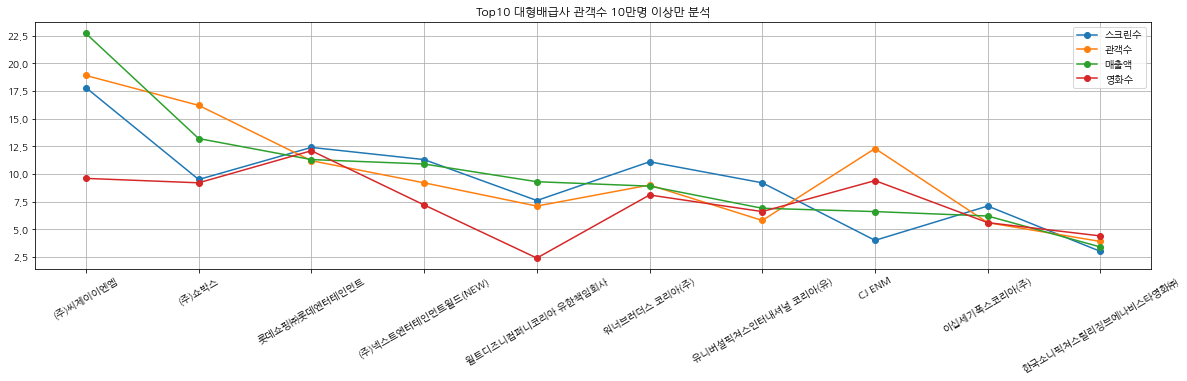

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,1,1)

plt.plot(test1['배급사'], test1['스크린수(백분율)'],'o-',label='스크린수')
plt.plot(test1['배급사'], test1['관객수(백분율)'],'o-',label='관객수')
plt.plot(test1['배급사'], test1['매출액(백분율)'],'o-',label='매출액')
plt.plot(test1['배급사'], test1['영화수(백분율)'],'o-',label='영화수')
plt.title("Top10 대형배급사 분석")
plt.xticks(fontsize=10, rotation=30)
plt.legend(loc=0)
ax1.grid()

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

fig = plt.figure(figsize=(20,10))
ax2 = plt.subplot(2,1,2)
plt.plot(test2['배급사'], test2['스크린수(백분율)'],'o-',label='스크린수')
plt.plot(test2['배급사'], test2['관객수(백분율)'],'o-',label='관객수')
plt.plot(test2['배급사'], test2['매출액(백분율)'],'o-',label='매출액')
plt.plot(test2['배급사'], test2['영화수(백분율)'],'o-',label='영화수')
plt.title("Top10 대형배급사 관객수 10만명 이상만 분석")
plt.xticks(fontsize=10, rotation=30)
plt.legend()
ax2.grid()


plt.show()

### 3) 신예 배급사 시각화에 필요한 데이터셋 생성
#### 백분율 추가

In [10]:
# 신예배급사 데이터 복사
test3 = top_new.copy()

# 신예배급사 백분율 구하기
s_new_sum = test3['스크린수'].sum() # 스크린수 합
p_new_sum = test3['관객수'].sum() # 관객수 합
t_new_sum = test3['매출액'].sum() # 매출액 합
m_new_sum = test3['영화수'].sum() # 영화수 합

new_sp = [] # 스크린수 백분율
new_pp = [] # 관객수 백분율
new_tp = [] # 매출액 백분율
new_mp = [] # 영화수 백분율

for i in range(0, 10):
    new_sp.append(round(test3['스크린수'][i]/s_new_sum*100,1))
    new_pp.append(round(test3['관객수'][i]/p_new_sum*100,1))
    new_tp.append(round(test3['매출액'][i]/t_new_sum*100,1))
    new_mp.append(round(test3['영화수'][i]/m_new_sum*100,1))
    
test3['스크린수(백분율)'] = new_sp
test3['관객수(백분율)'] = new_pp
test3['매출액(백분율)'] = new_tp
test3['영화수(백분율)'] = new_mp

# 신예배급사 시각화 데이터셋1; 전체 기준
test3

,배급사,스크린수,관객수,매출액,영화수,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,롯데컬처웍스(주)롯데엔터테인먼트,32408,53734219,4.498503e+11,37,62.5,78.5,78.2,33.6
1,(주)에이스메이커무비웍스,7938,9963749,8.546364e+10,7,15.3,14.6,14.9,6.4
2,(주)메리크리스마스,2245,2528324,2.134745e+10,3,4.3,3.7,3.7,2.7
3,(주)삼백상회,2814,560973,4.517505e+09,17,5.4,0.8,0.8,15.5
4,CGV ICECON,811,469561,4.079353e+09,3,1.6,0.7,0.7,2.7
5,(주)애니플러스,1096,310655,2.644039e+09,16,2.1,0.5,0.5,14.5
6,(주)트리플픽쳐스,2727,306080,2.490815e+09,23,5.3,0.4,0.4,20.9
7,(주)그노스,393,220394,1.926004e+09,2,0.8,0.3,0.3,1.8
8,(주)키위미디어그룹,832,190237,1.619782e+09,1,1.6,0.3,0.3,0.9
9,(주)셀트리온엔터테인먼트,624,172212,1.304862e+09,1,1.2,0.3,0.2,0.9


### 4) Top10 신예 배급사 영화 중 10만이 넘은 관객수를 기준으로 데이터셋

In [11]:
# 신예배급사 탑10 이름만 추출
top_new_name = pd.DataFrame(top_new['배급사'])

# 10만 넘은 관객수를 갖는 영화수
new_man_bae = new_df[new_df['관객수']>=100000].reset_index(drop=True)
new_mb = pd.merge(top_new_name, new_man_bae, how='left')
new_mb = new_mb.groupby('배급사').sum().sort_values('매출액', ascending=False)
new_mb.reset_index(inplace=True)

nman_count = new_man_bae.groupby('배급사')['영화명'].count() # 영화개수 세기
nman_count = pd.DataFrame(nman_count).reset_index() # 그룹바이 해제
nman_count = nman_count.rename(columns={'영화명':'영화수'}) # 컬럼명 변경

new_mb = pd.merge(new_mb, nman_count, how='left').reset_index(drop=True)
new_mb = new_mb.fillna(0)

# 최종 데이터셋; new_mb
new_mb

,배급사,스크린수,관객수,매출액,영화수
0,롯데컬처웍스(주)롯데엔터테인먼트,30574.0,53457081.0,4.477085e+11,26.0
1,(주)에이스메이커무비웍스,7938.0,9963749.0,8.546364e+10,7.0
2,(주)메리크리스마스,1840.0,2455563.0,2.082006e+10,2.0
3,CGV ICECON,774.0,467767.0,4.062749e+09,2.0
4,(주)삼백상회,472.0,326086.0,2.679300e+09,1.0
5,(주)그노스,314.0,217444.0,1.900914e+09,1.0
6,(주)키위미디어그룹,832.0,190237.0,1.619782e+09,1.0
7,(주)셀트리온엔터테인먼트,624.0,172212.0,1.304862e+09,1.0
8,(주)트리플픽쳐스,276.0,103251.0,8.716296e+08,1.0
9,(주)애니플러스,0.0,0.0,0.000000e+00,0.0


In [12]:
# 신예 배급사의 관객수 10만명 이상
test4 = new_mb.copy()

nm_sp = [] # 스크린수 백분율
nm_pp = [] # 관객수 백분율
nm_tp = [] # 매출액 백분율
nm_mp = [] # 영화수 백분율

for i in range(0, 10):
    nm_sp.append(round(test4['스크린수'][i]/s_new_sum*100,1))
    nm_pp.append(round(test4['관객수'][i]/p_new_sum*100,1))
    nm_tp.append(round(test4['매출액'][i]/t_new_sum*100,1))
    nm_mp.append(round(test4['영화수'][i]/m_new_sum*100,1))
    
test4['스크린수(백분율)'] = nm_sp
test4['관객수(백분율)'] = nm_pp
test4['매출액(백분율)'] = nm_tp
test4['영화수(백분율)'] = nm_mp

# 신예배급사 시각화 데이터셋2; 10만 기준
test4

,배급사,스크린수,관객수,매출액,영화수,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,롯데컬처웍스(주)롯데엔터테인먼트,30574.0,53457081.0,4.477085e+11,26.0,58.9,78.1,77.8,23.6
1,(주)에이스메이커무비웍스,7938.0,9963749.0,8.546364e+10,7.0,15.3,14.6,14.9,6.4
2,(주)메리크리스마스,1840.0,2455563.0,2.082006e+10,2.0,3.5,3.6,3.6,1.8
3,CGV ICECON,774.0,467767.0,4.062749e+09,2.0,1.5,0.7,0.7,1.8
4,(주)삼백상회,472.0,326086.0,2.679300e+09,1.0,0.9,0.5,0.5,0.9
5,(주)그노스,314.0,217444.0,1.900914e+09,1.0,0.6,0.3,0.3,0.9
6,(주)키위미디어그룹,832.0,190237.0,1.619782e+09,1.0,1.6,0.3,0.3,0.9
7,(주)셀트리온엔터테인먼트,624.0,172212.0,1.304862e+09,1.0,1.2,0.3,0.2,0.9
8,(주)트리플픽쳐스,276.0,103251.0,8.716296e+08,1.0,0.5,0.2,0.2,0.9
9,(주)애니플러스,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0


### ● 신예 배급사 그래프 분석

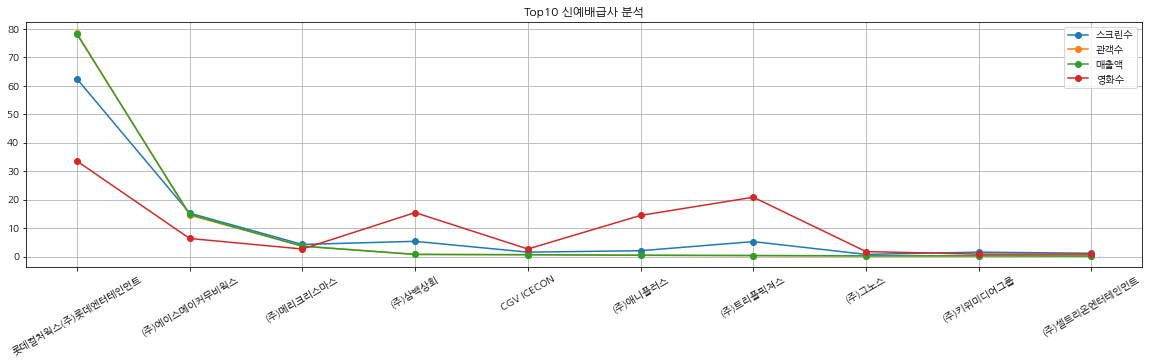

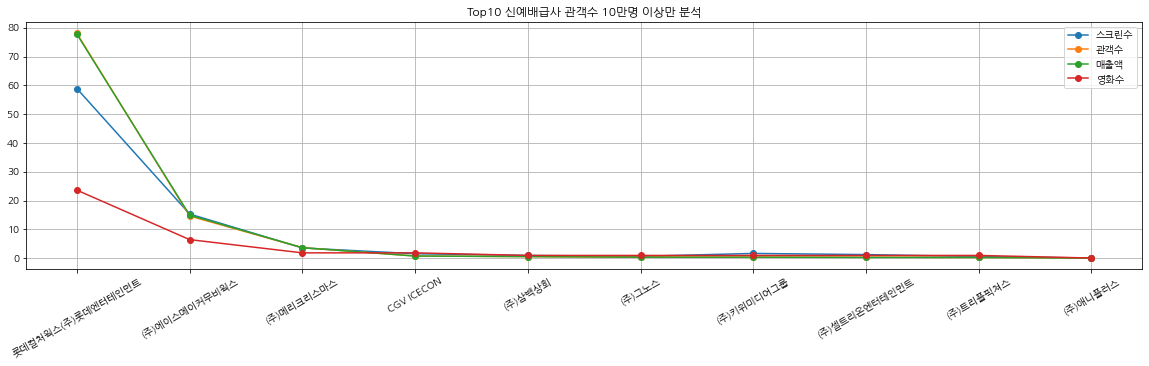

In [13]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,1,1)

plt.plot(test3['배급사'], test3['스크린수(백분율)'],'o-',label='스크린수')
plt.plot(test3['배급사'], test3['관객수(백분율)'],'o-',label='관객수')
plt.plot(test3['배급사'], test3['매출액(백분율)'],'o-',label='매출액')
plt.plot(test3['배급사'], test3['영화수(백분율)'],'o-',label='영화수')
plt.title("Top10 신예배급사 분석")
plt.xticks(fontsize=10, rotation=30)
plt.legend(loc=0)
ax1.grid()

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

fig = plt.figure(figsize=(20,10))
ax2 = plt.subplot(2,1,2)
plt.plot(test4['배급사'], test4['스크린수(백분율)'],'o-',label='스크린수')
plt.plot(test4['배급사'], test4['관객수(백분율)'],'o-',label='관객수')
plt.plot(test4['배급사'], test4['매출액(백분율)'],'o-',label='매출액')
plt.plot(test4['배급사'], test4['영화수(백분율)'],'o-',label='영화수')
plt.title("Top10 신예배급사 관객수 10만명 이상만 분석")
plt.xticks(fontsize=10, rotation=30)
plt.legend()
ax2.grid()


plt.show()

### ● 대형 배급사 vs 신예 배급사

In [14]:
# 대형배급사 전체 합 데이터
test_top = pd.DataFrame({'스크린수':s_sum,
                        '관객수':p_sum,
                        '매출액':t_sum,
                        '영화수':m_sum}, index=['대형배급사'])

# 신예배급사 전체 합 데이터
test_new = pd.DataFrame({'스크린수':s_new_sum,
                        '관객수':p_new_sum,
                        '매출액':t_new_sum,
                        '영화수':m_new_sum}, index=['신예배급사'])

# 대형배급사와 신예배급사 전체 합 데이터 병합
test5 = pd.concat([test_top,test_new], axis=0)
test5.reset_index(inplace=True)
test5 = test5.rename(columns={'index':'배급사'})

# 백분율 추가
test_ss = test5['스크린수'].sum() # 스크린수 합
test_ps = test5['관객수'].sum() # 관객수 합
test_ts = test5['매출액'].sum() # 매출액 합
test_ms = test5['영화수'].sum() # 영화수 합

test_sp = [] # 스크린수 백분율
test_pp = [] # 관객수 백분율
test_tp = [] # 매출액 백분율
test_mp = [] # 영화수 백분율

for i in range(0, 2):
    test_sp.append(round(test5['스크린수'][i]/test_ss*100,1))
    test_pp.append(round(test5['관객수'][i]/test_ps*100,1))
    test_tp.append(round(test5['매출액'][i]/test_ts*100,1))
    test_mp.append(round(test5['영화수'][i]/test_ms*100,1))
    
test5['스크린수(백분율)'] = test_sp
test5['관객수(백분율)'] = test_pp
test5['매출액(백분율)'] = test_tp
test5['영화수(백분율)'] = test_mp

test5

,배급사,스크린수,관객수,매출액,영화수,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,대형배급사,698894,2196938041,1.427841e+13,1868,93.1,97.0,96.1,94.4
1,신예배급사,51888,68456404,5.752437e+11,110,6.9,3.0,3.9,5.6


In [15]:
# 대형배급사와 신예배급사 합친 최종 데이터셋; test5
test5 = test5[['배급사','스크린수(백분율)','관객수(백분율)','매출액(백분율)','영화수(백분율)']]
test5

,배급사,스크린수(백분율),관객수(백분율),매출액(백분율),영화수(백분율)
0,대형배급사,93.1,97.0,96.1,94.4
1,신예배급사,6.9,3.0,3.9,5.6


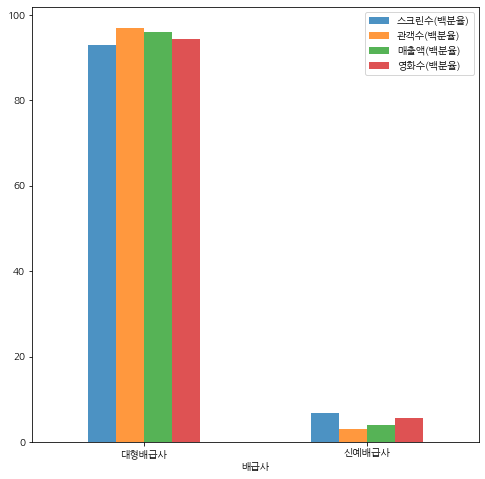

In [16]:
test5.plot.bar(x='배급사', alpha=0.8, figsize=(8,8))
plt.xticks(fontsize=10, rotation=0)

plt.legend(fontsize=10)

----------------------------------------------------------------